In [234]:
#load library
import time #menghitung waktu
import pickle #tipe data menyimpan model

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #proses belajar
from sklearn.metrics import classification_report #hasil belajar
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from imblearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [196]:
data = pd.read_csv('Prediction Insurance.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [197]:
# Function for cheking info data
def data_info(x):
    data_type = x.dtypes
    n_unique = x.nunique()
    missing_values = x.isnull().sum()
    percent_missing = (missing_values/len(x))*100
    print(f'Number of Rows, Columns {x.shape}')
    print(f'Number of Duplicated Values {x.duplicated().sum()}')
    
    return pd.DataFrame({'missing_values' : missing_values,
                            'percent_missing' : percent_missing,
                            'numbers_of_unique' : n_unique,
                            'data_type' : data_type}).sort_values(by= 'missing_values', ascending = False)
    
# Function for selecting categorical and numerical variables
def categorical(x):
    categorical = list(x.columns[x.dtypes == 'object'])
    return categorical

def numerical(x):
    numerical = list(x.columns[x.dtypes == 'int64']) + list(x.columns[x.dtypes == 'float64'])
    return numerical

In [198]:
# Dataset test.csv file
data_info(data)

Number of Rows, Columns (381109, 12)
Number of Duplicated Values 0


,missing_values,percent_missing,numbers_of_unique,data_type
id,0,0.0,381109,int64
Gender,0,0.0,2,object
Age,0,0.0,66,int64
Driving_License,0,0.0,2,int64
Region_Code,0,0.0,53,int64
Previously_Insured,0,0.0,2,int64
Vehicle_Age,0,0.0,3,object
Vehicle_Damage,0,0.0,2,object
Annual_Premium,0,0.0,48838,int64
Policy_Sales_Channel,0,0.0,155,int64


In [199]:
#data preprocessing
data = data.drop('id', axis=1)

In [200]:
categorical_col = categorical(data)
numerical_col = numerical(data)

In [201]:
for x in numerical_col:
    print(f'========== {x} ==========')
    print(f'{data[x].unique()}')
    print(f'------------------------------------------------------------------------')

========== Age ==========
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
------------------------------------------------------------------------
========== Driving_License ==========
[1 0]
------------------------------------------------------------------------
========== Region_Code ==========
[28  3 11 41 33  6 35 50 15 45  8 36 30 26 16 47 48 19 39 23 37  5 17  2
  7 29 46 27 25 13 18 20 49 22 44  0  9 31 12 34 21 10 14 38 24 40 43 32
  4 51 42  1 52]
------------------------------------------------------------------------
========== Previously_Insured ==========
[0 1]
------------------------------------------------------------------------
========== Annual_Premium ==========
[ 40454  33536  38294 ...  20706 101664  69845]
------------------------------------------------------------------------
========== Policy_Sales_Channel ==

In [202]:
for x in categorical_col:
    print(f'========== {x} ==========')
    print(f'{data[x].unique()}')
    print(f'------------------------------------------------------------------------')

========== Gender ==========


['Male' 'Female']
------------------------------------------------------------------------
========== Vehicle_Age ==========
['> 2 Years' '1-2 Year' '< 1 Year']
------------------------------------------------------------------------
========== Vehicle_Damage ==========
['Yes' 'No']
------------------------------------------------------------------------


In [203]:
# Numerical
data[numerical_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [204]:
# Categorical
data[categorical_col].describe().T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [205]:
target_variable = 'Response'

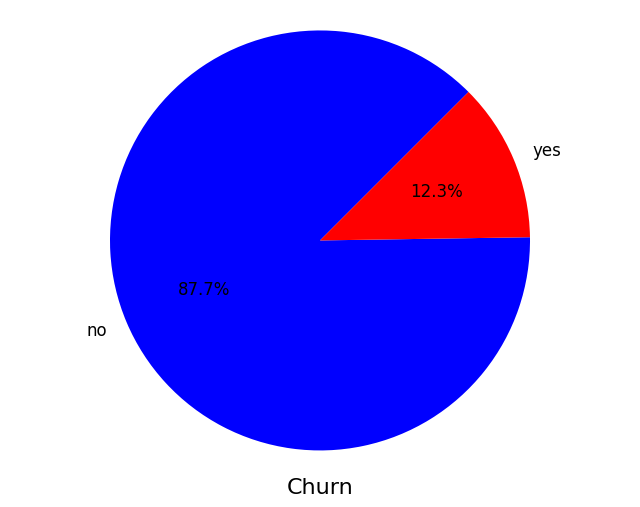

In [206]:
x = data[target_variable].value_counts(normalize=True)

plt.figure(figsize = (8,6))
colors = ['blue', 'red']
plt.pie(x, labels = ['no', 'yes'],
        colors= colors,
        autopct= '%1.1f%%',
        startangle=45,
        textprops={'fontsize': 12}
        )

plt.xlabel('Churn', fontsize= 16)
plt.axis('equal')
plt.show()

In [207]:
# Function to change object column to numeric column

def object_to_numeric(data):
    # Loop through each column in the DataFrame
    for col in data.columns:
        # Replace 'No' with 0 and 'Yes' with 1
        data[col] = data[col].replace({'No': 0, 'Yes': 1})
        # Replace 'Male' with 0 and 'Female' with 1
        data[col] = data[col].replace({'Male': 0, 'Female': 1})
        # Replace '> 2 Years', '1-2 Year', and '< 1 Year' with 0, 1, and 2 respectively
        data[col] = data[col].replace({'> 2 Years': 0, '1-2 Year': 1, '< 1 Year': 2})
   
    return data

In [208]:
dftrain_encode = object_to_numeric(data[categorical_col])

In [209]:
dftrain_encode.head()

,Gender,Vehicle_Age,Vehicle_Damage
0,0,0,1
1,0,1,0
2,0,0,1
3,0,2,0
4,1,2,0


In [210]:
new_dftrain = pd.concat([dftrain_encode, data[numerical_col]], axis= 1)

In [211]:
new_dftrain

,Gender,Vehicle_Age,Vehicle_Damage,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,0,1,44,1,28,0,40454,26,217,1
1,0,1,0,76,1,3,0,33536,26,183,0
2,0,0,1,47,1,28,0,38294,26,27,1
3,0,2,0,21,1,11,1,28619,152,203,0
4,1,2,0,29,1,41,1,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,0,1,0,74,1,26,1,30170,26,88,0
381105,0,2,0,30,1,37,1,40016,152,131,0
381106,0,2,0,21,1,30,1,35118,160,161,0
381107,1,0,1,68,1,14,0,44617,124,74,0


In [217]:
def normalize(data):
    scaler = MinMaxScaler()
    X_transform = scaler.fit_transform(data)
    X_transform = pd.DataFrame(X_transform, columns= data.columns)
    
    return X_transform

In [218]:
df = normalize(new_dftrain)

In [219]:
df.head()

,Gender,Vehicle_Age,Vehicle_Damage,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0.0,0.0,1.0,0.369231,1.0,0.538462,0.0,0.070366,0.154321,0.716263,1.0
1,0.0,0.5,0.0,0.861538,1.0,0.057692,0.0,0.057496,0.154321,0.598616,0.0
2,0.0,0.0,1.0,0.415385,1.0,0.538462,0.0,0.066347,0.154321,0.058824,1.0
3,0.0,1.0,0.0,0.015385,1.0,0.211538,1.0,0.048348,0.932099,0.667820,0.0
4,1.0,1.0,0.0,0.138462,1.0,0.788462,1.0,0.046259,0.932099,0.100346,0.0


In [235]:
#data modelling
X = df.drop('Response', axis=1) #inputan
y = df['Response'] #outputan

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [237]:
# Pilih model (misalnya Random Forest)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [238]:
#model export
with open('modelDecisionTree.pkl','wb') as file:
    pickle.dump(model, file)

In [239]:
#model evaluation
y_predict = model.predict(x_test)
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     66242
         1.0       0.32      0.30      0.31      9980

    accuracy                           0.82     76222
   macro avg       0.61      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222

